<a href="https://colab.research.google.com/github/mjplacroix/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Sprint_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [156]:
eth_df = pd.read_csv('https://raw.githubusercontent.com/mjplacroix/lambda_project_1/master/ETH_master_dataset_features.csv')
eth_df.shape

(1645, 26)

In [157]:
eth_df.dtypes

Date(UTC)               object
NetworkUtilization     float64
TransactionFee         float64
BlockDifficulty        float64
NetworkHash            float64
Uncles                   int64
BlockCountRewards        int64
BlockReward            float64
GasUsed                  int64
GasLimit                 int64
Value (Wei)              int64
BlockTime              float64
BlockSize                int64
AddressCount             int64
TxGrowth                 int64
Ethersupply2           float64
Supply                 float64
MarketCap              float64
Price                  float64
Year                     int64
Month                    int64
Day                      int64
Price_tomorrow         float64
Price_change_amount    float64
Price_change             int64
Percent                float64
dtype: object

### MAE measure - discover how many days MAE >= 50 in last 50-100-200-365 days. 

In [0]:
eth_df_length = range(1, len(eth_df['Price']))
over50 = []


for i in eth_df_length:
  if eth_df.iloc[i]['Price_change_amount'] >= 50:
    over50.append(eth_df.iloc[i]['Date(UTC)'])

In [159]:
over50

['2017-06-10',
 '2017-06-12',
 '2017-11-24',
 '2017-12-11',
 '2017-12-12',
 '2017-12-18',
 '2018-01-02',
 '2018-01-03',
 '2018-01-07',
 '2018-01-09',
 '2018-01-12',
 '2018-01-13',
 '2018-01-20',
 '2018-01-24',
 '2018-01-27',
 '2018-01-28',
 '2018-02-03',
 '2018-02-06',
 '2018-02-08',
 '2018-02-09',
 '2018-02-12',
 '2018-02-14',
 '2018-02-23',
 '2018-04-12',
 '2018-04-24',
 '2018-05-03',
 '2018-05-29']

In [160]:
# splitting into train (1315), validate (165), and test (165)
train = eth_df[eth_df['Date(UTC)'] < '2019-03-01']
val  = eth_df[eth_df['Date(UTC)'] >= '2019-03-01']
test = val[val['Date(UTC)'] > '2019-08-15']
val = val[val['Date(UTC)'] <= '2019-08-15']
train.shape, val.shape, test.shape

((1310, 26), (168, 26), (167, 26))

In [0]:
# dropping datetime column
train = train.drop(['Date(UTC)'], axis=1)
val = val.drop(['Date(UTC)'], axis=1)
test = test.drop(['Date(UTC)'], axis=1)

In [0]:
# dropping MarketCap column since it too closely mimics price
train = train.drop(['MarketCap'], axis=1)
val = val.drop(['MarketCap'], axis=1)
test = test.drop(['MarketCap'], axis=1)

In [0]:
# # dropping MarketCap column since it too closely mimics price
# train = train.drop(['Price'], axis=1)
# val = val.drop(['Price'], axis=1)
# test = test.drop(['Price'], axis=1)

In [164]:
train.head()

,NetworkUtilization,TransactionFee,BlockDifficulty,NetworkHash,Uncles,BlockCountRewards,BlockReward,GasUsed,GasLimit,Value (Wei),BlockTime,BlockSize,AddressCount,TxGrowth,Ethersupply2,Supply,Price,Year,Month,Day,Price_tomorrow,Price_change_amount,Price_change,Percent
0,0.0,0.0,0.121,11.5297,1299,6912,39316.09375,0,0,0,4.46,644,9205,8893,7.204931e+07,7.204931e+07,0.0,2015,7,30,0.0,0.0,0,0.0
1,0.0,0.0,0.603,51.4594,511,6863,36191.71875,0,0,0,12.58,582,9361,0,7.208550e+07,7.208550e+07,0.0,2015,7,31,0.0,0.0,0,0.0
2,0.0,0.0,0.887,57.7845,334,5293,27705.93750,0,0,0,16.34,575,9476,0,7.211320e+07,7.211320e+07,0.0,2015,8,1,0.0,0.0,0,0.0
3,0.0,0.0,1.020,67.9224,394,5358,28223.43750,0,0,0,16.12,581,9563,0,7.214143e+07,7.214143e+07,0.0,2015,8,2,0.0,0.0,0,0.0
4,0.0,0.0,1.126,74.5737,443,5280,27976.71875,0,0,0,16.37,587,9639,0,7.216940e+07,7.216940e+07,0.0,2015,8,3,0.0,0.0,0,0.0


In [165]:
# Tomorrow price is the target
target = 'Price_tomorrow'

# filtering out target
train_features = train.drop(columns=[target])
features = train_features.columns.tolist()

# separating in X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

X_train.shape, X_val.shape, X_test.shape

((1310, 23), (168, 23), (167, 23))

In [166]:
X_train.columns

Index(['NetworkUtilization', 'TransactionFee', 'BlockDifficulty',
       'NetworkHash', 'Uncles', 'BlockCountRewards', 'BlockReward', 'GasUsed',
       'GasLimit', 'Value (Wei)', 'BlockTime', 'BlockSize', 'AddressCount',
       'TxGrowth', 'Ethersupply2', 'Supply', 'Price', 'Year', 'Month', 'Day',
       'Price_change_amount', 'Price_change', 'Percent'],
      dtype='object')

## Initial Baselines

- Simple majority mean

In [167]:
from sklearn.metrics import mean_absolute_error

y_pred = []
y_pred.append(y_train.mean())
y_pred = y_pred * len(train)
MAE = mean_absolute_error(y_train, y_pred)
print(f"Majority Train MAE: {MAE:.2f}")

y_pred = []
y_pred.append(y_train.mean())
y_pred = y_pred * len(y_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Majority Val MAE: {mae:.2f}')

Majority Train MAE: 206.93
Majority Val MAE: 48.64


- Linear Regression
 - Metrics: MSA, RMSA, R^2

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# Print regression metrics
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print('Training error')
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2:', r2)

#Validation Error
model.fit(X_val, y_val)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print('\nValidation Error')
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2:', r2)

Training error
Mean Squared Error: 11686.166680024337
Root Mean Squared Error: 108.10257480756107
R^2: 0.8356999435234366

Validation Error
Mean Squared Error: 894.9831295443516
Root Mean Squared Error: 29.91626864340457
R^2: 0.7085624349629799


Majority Classification (whether prices goes up or down)

- Majority (~52%) goes down

In [169]:
X_train['Price_change'].value_counts(normalize=True)

0    0.520611
1    0.479389
Name: Price_change, dtype: float64

### Decision Tree
- Baseline is ~0.781



- What metrics can I use to compare with each?
- MAE? R^2? MSE? RMSE?
  - try to better understand what each is uniquely telling you

In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    DecisionTreeRegressor(max_depth=5, min_samples_leaf=33, random_state=42)
)

pipeline.fit(X_train, y_train)

# should I even be doing Train Accuracy?
# If it's trained on such it's likely to get 1.0? 
print('Train Accuracy:', pipeline.score(X_train, y_train))
val_score = pipeline.score(X_val, y_val)
print('Validation Accuracy:', round(val_score, 4))

# Can I also get an MAE from this? 


# not concerned about this yet
y_pred = pipeline.predict(X_test)

Train Accuracy: 0.9879714894227022
Validation Accuracy: 0.9265


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


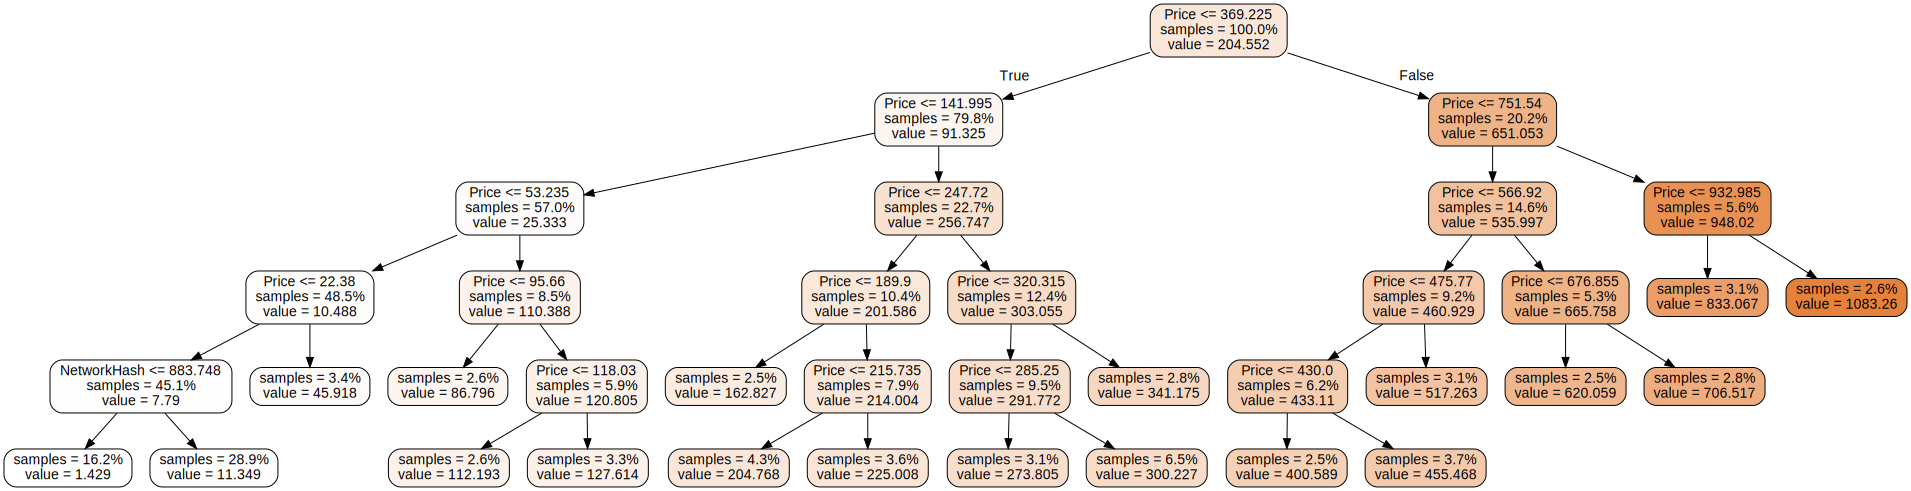

In [171]:
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeregressor']

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=5, 
                           feature_names=X_train.columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

### Random Forest

In [172]:
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    RandomForestRegressor(n_jobs=-1, random_state=0)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

# Can I also get an MAE from this? 

# What is validation accuracy? 

Validation Accuracy: 0.9238618075991644


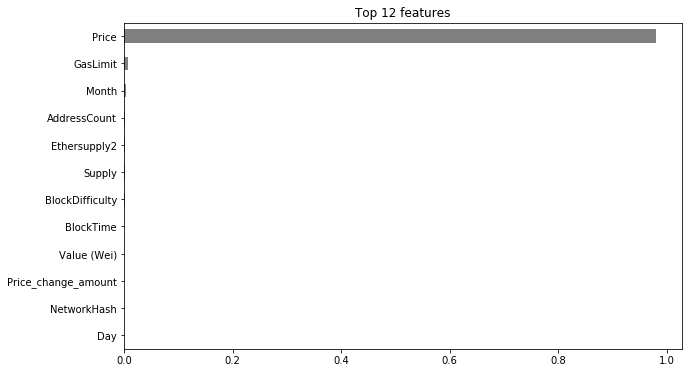

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot top n feature importances
n = 12
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

- Cross Validation

In [174]:
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    SelectKBest(f_regression, k=20), 
    Ridge(alpha=1.0)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [ 21.50120097  15.11843447 135.46574044]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.58784e-45): result may not be accurate.
  overwrite_a=True).T


In [175]:
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline( 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [  4.29813204  20.76943707 236.32329518]


In [176]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [177]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    DecisionTreeRegressor()
)

depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [  3.33519451  27.08306636 422.54247706]


In [178]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = make_pipeline(
    SelectKBest(f_regression), 
    Ridge()
)

param_distributions = {
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': [0.1, 1, 10], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 69 candidates, totalling 345 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 69 is smaller than n_iter=100. Running 69 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0236s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0496s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0958s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1685s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    1.3s
[Paralle

In [179]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'selectkbest__k': 1, 'ridge__alpha': 0.1}
Cross-validation MAE 9.64047629813413


In [0]:
y_pred = search.predict(X_val)

In [181]:
MAE = mean_absolute_error(y_val, y_pred)
MAE

6.927950049595443

In [182]:
y_pred = search.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
MAE

4.3058535503039215

### XGDBoost

### Further things to do:
- ### Random Forest
- What is "Validation Accuracy" from a Decision Tree or Random Forest model?
- Why can't I get MAE from them?
    - Can I? 
- ### Cross Validation models
    - Can I not get a "validation score" bc it's in the name? 
        - Again, what is it?
    - Are the scores I'm getting a smattering of MAEs?
    - Prob need to go back and watch lecture/notebook to max out finetuning CV hyperparameters
- ### Classification
    - get and interpret a Confusion Matrix

### Tom price movement (simple up or down) - (classification)

### Does Select K-best work on logistic regression?
### Is K-means unhelpful or irrelevant for this project?

In [183]:
X_train.columns

Index(['NetworkUtilization', 'TransactionFee', 'BlockDifficulty',
       'NetworkHash', 'Uncles', 'BlockCountRewards', 'BlockReward', 'GasUsed',
       'GasLimit', 'Value (Wei)', 'BlockTime', 'BlockSize', 'AddressCount',
       'TxGrowth', 'Ethersupply2', 'Supply', 'Price', 'Year', 'Month', 'Day',
       'Price_change_amount', 'Price_change', 'Percent'],
      dtype='object')

In [184]:
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest has a similar API to what we've seen before.
selector = SelectKBest(score_func=f_regression, k=6)

X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

#split
selected_mask = selector.get_support()
all_names = X_train.columns
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print('\nFeatures not selected:')
for name in unselected_names:
    print(name)

Features selected:
NetworkUtilization
Uncles
GasUsed
BlockSize
TxGrowth
Price

Features not selected:
TransactionFee
BlockDifficulty
NetworkHash
BlockCountRewards
BlockReward
GasLimit
Value (Wei)
BlockTime
AddressCount
Ethersupply2
Supply
Year
Month
Day
Price_change_amount
Price_change
Percent


In [185]:
MAE_list = []

for k in range(1, len(X_train.columns)+1):
    print(f'{k} features')

    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    MAE_list.append(int(mae))
    print(f'Test Mean Absolute Error: ${mae:,.0f} \n')

1 features
Test Mean Absolute Error: $7 

2 features
Test Mean Absolute Error: $8 

3 features
Test Mean Absolute Error: $8 

4 features
Test Mean Absolute Error: $8 

5 features
Test Mean Absolute Error: $8 

6 features
Test Mean Absolute Error: $8 

7 features
Test Mean Absolute Error: $12 

8 features
Test Mean Absolute Error: $11 

9 features
Test Mean Absolute Error: $11 

10 features
Test Mean Absolute Error: $257 

11 features
Test Mean Absolute Error: $257 

12 features
Test Mean Absolute Error: $257 

13 features
Test Mean Absolute Error: $228 

14 features
Test Mean Absolute Error: $228 

15 features
Test Mean Absolute Error: $86 

16 features
Test Mean Absolute Error: $86 

17 features
Test Mean Absolute Error: $86 

18 features
Test Mean Absolute Error: $86 

19 features
Test Mean Absolute Error: $86 

20 features
Test Mean Absolute Error: $86 

21 features
Test Mean Absolute Error: $86 

22 features
Test Mean Absolute Error: $86 

23 features
Test Mean Absolute Error: $86 

### Graphing the impact of each increased feature for linear regression

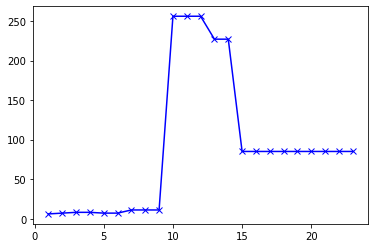

In [186]:
import matplotlib.pyplot as plt

X = range(1, len(MAE_list)+1)

plt.plot(X, MAE_list, 'bx-')
plt.show()

- Try to work on the app to deploy price predictions

Etherscan API - https://etherscan.io/apis

Messario API - https://messari.io/api

### Interesting exploratory question. Will I get a different model or modeling accuracy if I move the decimal right twice to convert everything to whole dollars (integers)?